### 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn

# 한글 설정 /차트 마이너스 깨짐현상 해결
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

##### 훈련세트 / 테스트세트 분리

In [4]:
from sklearn.model_selection import train_test_split

# 훈련세트 / 테스트세트 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
# 훈련입력세트 / 테스트입력세트 2차원으로 변경
new_train_input = np.row_stack((train_input))
new_train_input.shape

(42, 1)

In [8]:
new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

##### 모델훈련

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

In [11]:
knr.fit(X=new_train_input, y=train_target)

KNeighborsRegressor(n_neighbors=3)

In [12]:
# 결정계수 확인
knr.score(X=new_train_input, y=train_target)

0.9804899950518966

In [13]:
knr.score(X=new_test_input, y=test_target)

0.9746459963987609

In [14]:
# 길이가 50cm일때 무게가 얼마로 예측될까요?
knr.predict([[50.0]])

array([1033.33333333])

##### 얼래? 무게가 1500g이 넘는데?
(머신러닝 모델이 쓰레기 아냐?)

런닝머신? 머신런닝?

#### 훈련세트에 대한 산점도

<function matplotlib.pyplot.show(close=None, block=None)>

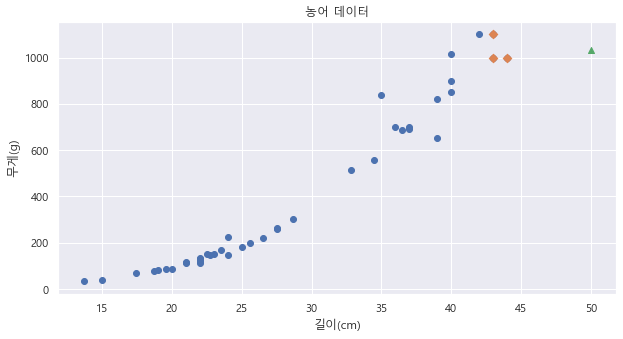

In [19]:
# 길이 50cm 농어에 대한 이웃값 3개->100cm로 변경해서 실행해 볼 것
dist, inds = knr.kneighbors([[50.0]])


plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
plt.scatter(x=new_train_input[inds], y=train_target[inds], marker='D')
plt.scatter(x=50, y=knr.predict([[50.0]]), marker='^')
plt.title('농어 데이터')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show

##### 이웃(3개) 평균

In [21]:
np.mean(train_target[inds])

1033.3333333333333

In [23]:
knr.predict(X=[[100]])

array([1033.33333333])

#### 선형회귀 Linear Regression

가장 대표적인 회귀 알고리즘

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [26]:
# 선형회귀 모델로 훈련
lr.fit(X=new_train_input, y=train_target)

LinearRegression()

In [27]:
# 결정계수 확인
lr.score(X=new_train_input, y = train_target)

0.9398463339976041

In [29]:
# 테스트데이터로 결정계수확인
lr.score(X=new_test_input, y=test_target)

0.824750312331356

In [31]:
# 길이 50cm 예측
lr.predict([[50.0]])
#1033.3333(KNN) vs 1241.83860323(lr)

array([1241.83860323])

In [32]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


- coef_(계수) = 가중치(weight) = 기울기
- intercept_(절편) = 잔차(error)

##### Linear Regression 산점도

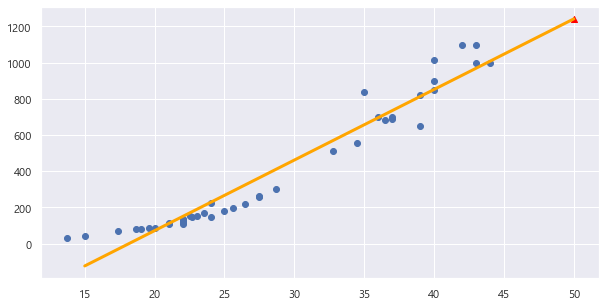

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
plt.scatter(x=50, y=lr.predict([[50]]), marker='^', color='red')

# 1차방정식 선
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='orange', linewidth = '3.0')
plt.plot
plt.show()

##### 다항회귀

In [42]:
train_poly = np.column_stack((new_train_input **2, new_train_input))
train_poly.shape

(42, 2)

In [45]:
test_ploy = np.column_stack((new_test_input**2, new_test_input))
test_ploy

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [46]:
print(train_poly.shape, test_ploy.shape)

(42, 2) (14, 2)


In [47]:
lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)

LinearRegression()

In [48]:
lr.score(X=train_poly, y= train_target)

0.9706807451768623

In [50]:
lr.score(X=test_ploy, y=test_target)

0.9775935108325122

In [56]:
# 길이 50cm 농어의 무게 예측
# 길이의 제곱, 길이
lr.predict([[50.0**2, 50.0]])
# 농어의 무게 예측 = 1573.98g

array([1573.98423528])

In [58]:
# a*길이^2 +b*길이 + c
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


##### 다항 회귀 산점도

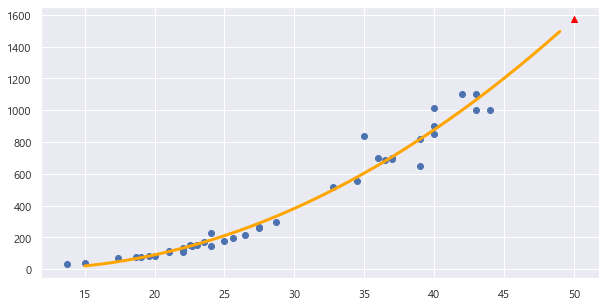

In [63]:
point = np.arange(15, 50)

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
#15~49까지의 2차 방정식 그림
plt.plot(point, lr.coef_[0]*(point**2) +lr.coef_[1]*point + lr.intercept_, color = 'orange', linewidth='3.0')

plt.scatter(x=[50.0], y=lr.predict([[50.0**2, 50.0]]), marker='^',color='red')
plt.show()